# Class 7: Word Embeddings

In this class, we will explore three relatively simple applications of word embeddings:

1. We will begin by importing embeddings from Word2Vec to demonstrate some basic operations with them.
2. Next, we will transition to using SpaCy and its pre-trained embeddings to implement a k-means clustering algorithm. This serves as an example of how to incorporate embeddings into a pipeline with which you are already familiar.
3. Finally, we will use the data we have to train our own embeddings. Given that our data comes from 1858 and 1958, this will enable us to compare how the meanings of words have evolved over time. This application exemplifies a type of task that is relatively novel to us.


### Pre-trained Embdeddings 

Other options available directly from Gensim include:
- `fasttext-wiki-news-subwords-300`
- `conceptnet-numberbatch-17-06-300`
- `word2vec-ruscorpora-300`
- `word2vec-google-news-300`
- `glove-wiki-gigaword-50`
- `glove-wiki-gigaword-100`
- `glove-wiki-gigaword-200`
- `glove-wiki-gigaword-300`
- `glove-twitter-25`
- `glove-twitter-50`
- `glove-twitter-100`
- `glove-twitter-200`

If the code below gives you problems, you can download the file directly from here:
[https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?resourcekey=0-wjGZdNAUop6WykTtMip30g](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?resourcekey=0-wjGZdNAUop6WykTtMip30g)

Then, place it in a folder and specify its path in `model_path`:

```python
# Load the pre-trained Word2Vec model (this may take some time)
# model_path = 'YOUR_MODEL_PATH_HERE'
# word_vectors = KeyedVectors.load_word2vec_format(model_path, binary=True)


In [57]:
import gensim.downloader as api

# Download the "word2vec-google-news-300" model
word_vectors = api.load('word2vec-google-news-300') #beware  the file is 1.6GB. You may want to download versions that are smaller.

# Now you can use the model
print(word_vectors['computer'])  # Example: Get the vector for the word "computer"

[ 1.07421875e-01 -2.01171875e-01  1.23046875e-01  2.11914062e-01
 -9.13085938e-02  2.16796875e-01 -1.31835938e-01  8.30078125e-02
  2.02148438e-01  4.78515625e-02  3.66210938e-02 -2.45361328e-02
  2.39257812e-02 -1.60156250e-01 -2.61230469e-02  9.71679688e-02
 -6.34765625e-02  1.84570312e-01  1.70898438e-01 -1.63085938e-01
 -1.09375000e-01  1.49414062e-01 -4.65393066e-04  9.61914062e-02
  1.68945312e-01  2.60925293e-03  8.93554688e-02  6.49414062e-02
  3.56445312e-02 -6.93359375e-02 -1.46484375e-01 -1.21093750e-01
 -2.27539062e-01  2.45361328e-02 -1.24511719e-01 -3.18359375e-01
 -2.20703125e-01  1.30859375e-01  3.66210938e-02 -3.63769531e-02
 -1.13281250e-01  1.95312500e-01  9.76562500e-02  1.26953125e-01
  6.59179688e-02  6.93359375e-02  1.02539062e-02  1.75781250e-01
 -1.68945312e-01  1.21307373e-03 -2.98828125e-01 -1.15234375e-01
  5.66406250e-02 -1.77734375e-01 -2.08984375e-01  1.76757812e-01
  2.38037109e-02 -2.57812500e-01 -4.46777344e-02  1.88476562e-01
  5.51757812e-02  5.02929

In [58]:
result = word_vectors.most_similar(positive=['woman', 'king'], negative=['man'])
print(result)

[('queen', 0.7118192911148071), ('monarch', 0.6189674735069275), ('princess', 0.5902431011199951), ('crown_prince', 0.5499460697174072), ('prince', 0.5377321243286133), ('kings', 0.5236844420433044), ('Queen_Consort', 0.5235945582389832), ('queens', 0.5181134343147278), ('sultan', 0.5098593235015869), ('monarchy', 0.5087411403656006)]


In [59]:
result = word_vectors.most_similar(positive=['france', 'rome'], negative=['paris'])
print(result)

[('italy', 0.519952118396759), ('european', 0.5075846314430237), ('italian', 0.5057743191719055), ('epl', 0.490744411945343), ('spain', 0.4888668656349182), ('england', 0.4852672219276428), ('italians', 0.4842422604560852), ('kosovo', 0.48134922981262207), ('lampard', 0.4807734787464142), ('malta', 0.4788566529750824)]


In [60]:
result = word_vectors.most_similar(positive=['king'])
print(result)

[('kings', 0.7138046622276306), ('queen', 0.6510956287384033), ('monarch', 0.6413194537162781), ('crown_prince', 0.6204219460487366), ('prince', 0.6159993410110474), ('sultan', 0.5864824056625366), ('ruler', 0.5797566771507263), ('princes', 0.5646552443504333), ('Prince_Paras', 0.5432944297790527), ('throne', 0.5422105193138123)]


### Using SpaCy

We will download the medium model from SpaCy, there is also a large version which should perform better.

In [61]:
import spacy
nlp = spacy.load('en_core_web_md')

This documentation and resources explore how spaCy generates embeddings, notably using FastText enhanced by Floret instead of traditional Word2Vec:

- [Vectors & Similarity in spaCy](https://spacy.io/usage/linguistic-features#vectors-similarity)
- [spaCy Vectors Builder on GitHub](https://github.com/explosion/spacy-vectors-builder)
- [Floret Vectors by Explosion AI](https://explosion.ai/blog/floret-vectors)

#### Key Highlights:

- **FastText and Floret**: FastText, known for handling out-of-vocabulary (OOV) words through subword information, is further improved by Floret. Floret enhances embedding quality by efficiently merging subword and word-level data.

- **Advantages**: This approach is particularly effective for texts with typos and morphologically rich languages, thanks to its subword tokenization. It's faster and manages typographical variations well.

- **Limitations**: While robust for general tasks, the precision in specific contexts, like word sense disambiguation, might be slightly compromised due to subword tokenization.

- **FastText vs. Word2Vec**: Unlike Word2Vec, FastText with Floret can infer embeddings for unseen words, offering broader linguistic coverage and adaptability.

In [62]:
king = nlp('king')
queen = nlp('queen')
man = nlp('man')
woman = nlp('woman')

print(king.similarity(queen))
print(man.similarity(woman))

0.6108841628588695
0.8273442557707831


In [63]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def normalize_vector(vector):
    """Normalize a vector to unit length."""
    norm = np.linalg.norm(vector)
    if norm == 0:
        return vector
    return vector / norm

def calculate_similarity(vector1, vector2):
    """Calculate cosine similarity between two vectors."""
    vector1_normalized = normalize_vector(vector1).reshape(1, -1)
    vector2_normalized = normalize_vector(vector2).reshape(1, -1)
    return cosine_similarity(vector1_normalized, vector2_normalized)[0][0]

# Example tokens
king = nlp('king').vector
queen = nlp('queen').vector
man = nlp('man').vector
woman = nlp('woman').vector

# Direct similarity comparisons
print(calculate_similarity(king, queen))
print(calculate_similarity(king-man, queen-woman))
print(calculate_similarity(woman-man+king, queen))


0.6108842
0.6642982
0.6178015


We can notice how the parallelogram operation here is les precise than before.

### Import the data

In [64]:
from datasets import load_dataset
dataset = load_dataset("dell-research-harvard/AmericanStories",
                       "subset_years",
                       year_list=["1858", "1958"],
                       trust_remote_code=True
                       )

In [65]:
df = dataset['1958'].to_pandas()

df['article'] = (df['article']
                  .str.replace('-\n', '')  # Remove hyphenated line breaks
                  .str.replace('\n', ' ')  # Replace newline characters with spaces
                  .str.lower()  # Convert to lowercase
                  .str.strip()  # Strip leading and trailing spaces
                  .str.replace('\s{2,}', ' ', regex=True)  # Replace sequences of spaces with a single space
                  )


df['headline'] = (df['headline']
                  .str.replace('-\n', '')  # Remove hyphenated line breaks
                  .str.replace('\n', ' ')  # Replace newline characters with spaces
                  .str.lower()  # Convert to lowercase
                  .str.strip()  # Strip leading and trailing spaces
                  .str.replace('\s{2,}', ' ', regex=True)  # Replace sequences of spaces with a single space
                  )

df.head()

,article_id,newspaper_name,edition,date,page,headline,byline,article
0,2_1958-07-12_p36_sn83045462_00280608804_195807...,Evening star.,01,1958-07-12,p36,you con bleach old furniture,,sometimes when you take on the old finish from...
1,3_1958-07-12_p36_sn83045462_00280608804_195807...,Evening star.,01,1958-07-12,p36,seuionts described,,"new types of coverings f0r floors, walls, ceil..."
2,4_1958-07-12_p36_sn83045462_00280608804_195807...,Evening star.,01,1958-07-12,p36,dwellings approved in prince georges,,recent building permits is sued by prince geor...
3,5_1958-07-12_p36_sn83045462_00280608804_195807...,Evening star.,01,1958-07-12,p36,,,"edward walters, bi2f b3rd ave, camp springs ow..."
4,7_1958-07-12_p36_sn83045462_00280608804_195807...,Evening star.,01,1958-07-12,p36,silver spring sloo wire avenue,,"lovely, large brick home on beau. iaininr. ily..."


In [66]:
len(df.loc[df['headline']==''])

39188

In [67]:
df1 = df.loc[df['headline']!='']

The function described above could serve as a method for preprocessing text, adhering to the guidelines outlined in our class materials. Notably, it leverages spaCy for sentence splitting—a task at which this library excels, outperforming Gensim.

Should you wish to execute the code mentioned previously, please ensure to select the cells above in the notebook and set them as `code`, not `raw`, as they currently are.

Given that the execution of this code can be slow, we will proceed with cleaning the data using a more expedited process, albeit with the understanding that the results could potentially be enhanced.

Before we train our own embeddings, let's explore whether pre-trained embeddings could be beneficial for tasks with which we are already familiar.

In [68]:
# Function to process a headline and return its vector
def get_headline_vector(headline):
    return nlp(headline).vector

# Apply the function to each headline and store the result
df1['headline_vector'] = df1['headline'].apply(get_headline_vector)


/var/folders/yb/r8nfzz157g74kd6zg_3x_nch0000gn/T/ipykernel_42248/4130295400.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['headline_vector'] = df1['headline'].apply(get_headline_vector)


In [69]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [70]:
X = np.array(df1['headline_vector'].tolist())


For n_clusters = 20, The average silhouette_score is : 0.05776038393378258


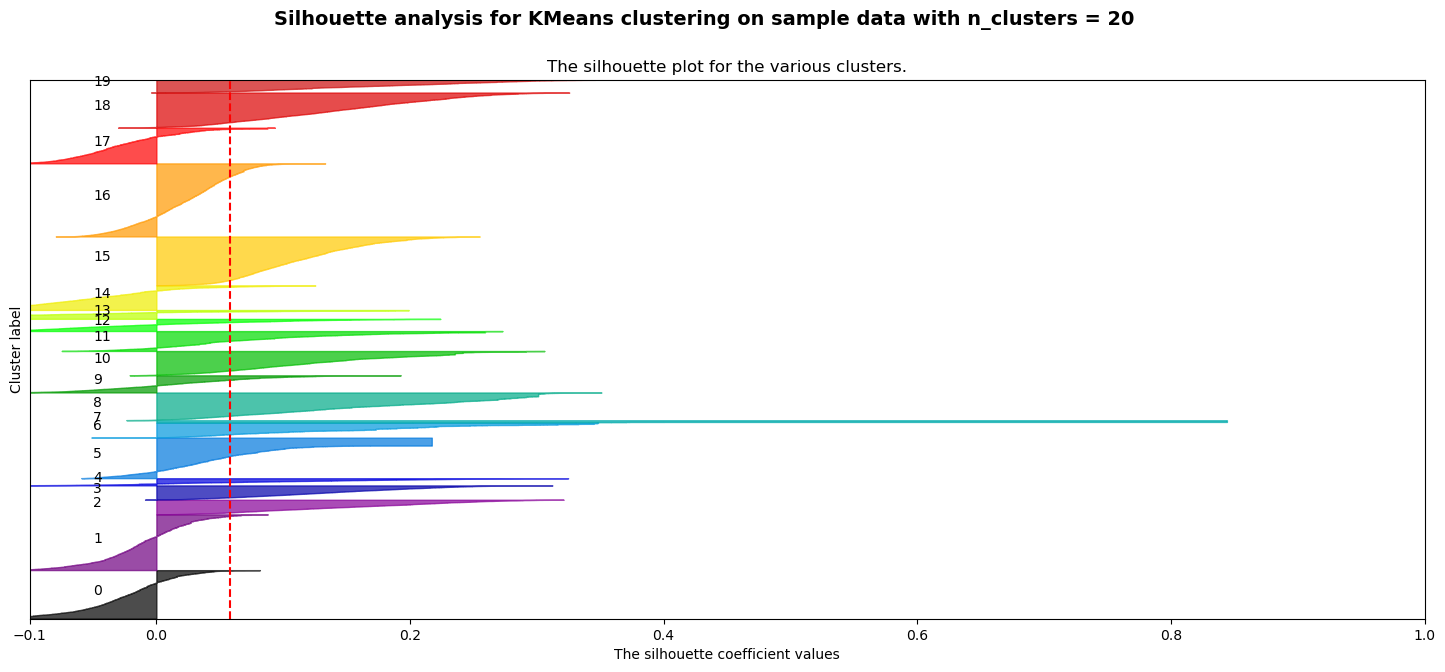

In [71]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

range_n_clusters = [20]

for n_clusters in range_n_clusters:
    # Create a subplot
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(18, 7)

    # Set limits for the silhouette plot
    ax1.set_xlim([-0.1, 1])
    # Inserting blank space between silhouette plots of individual clusters
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters}, The average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate and sort silhouette scores for samples belonging to cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers in the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(f"Silhouette analysis for KMeans clustering on sample data with n_clusters = {n_clusters}", fontsize=14, fontweight="bold")

plt.show()

#### Let's now prepare the data for 1858

In [72]:
df = dataset['1858'].to_pandas()

df['article'] = (df['article']
                 .str.replace('-\n', '')  # Remove hyphenated line breaks
                 .str.replace('\n', ' ')  # Replace newline characters with spaces
                 .str.lower()  # Convert to lowercase
                 .str.strip()  # Strip leading and trailing spaces
                 .str.replace('\s{2,}', ' ', regex=True)  # Replace sequences of spaces with a single space
                 )

df['headline'] = (df['headline']
                  .str.replace('-\n', '')  # Remove hyphenated line breaks
                  .str.replace('\n', ' ')  # Replace newline characters with spaces
                  .str.lower()  # Convert to lowercase
                  .str.strip()  # Strip leading and trailing spaces
                  .str.replace('\s{2,}', ' ', regex=True)  # Replace sequences of spaces with a single space
                  )

df.head()
len(df.loc[df['headline'] == ''])
df2 = df.loc[df['headline'] != '']

In [73]:
len(df1) #1958

59500

In [74]:
len(df2) #1858

92025

### Train Embeddings
#### Starting with 1958 Data
To train embeddings, with a focus on data from 1958, we must consider that the model necessitates sentences as input. This requirement is outlined in [Gensim's documentation on Word2Vec](https://radimrehurek.com/gensim/models/word2vec.html). Consequently, we need to modify our standard preprocessing approach to accommodate this specification.


In [75]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/trotesi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [76]:
from nltk.tokenize import sent_tokenize
df1['sentences'] = df1['article'].apply(sent_tokenize)


In [77]:
df1.head()

,article_id,newspaper_name,edition,date,page,headline,byline,article,headline_vector,sentences
0,2_1958-07-12_p36_sn83045462_00280608804_195807...,Evening star.,01,1958-07-12,p36,you con bleach old furniture,,sometimes when you take on the old finish from...,"[-1.8688599, 2.38372, -4.40284, -2.475366, -0....",[sometimes when you take on the old finish fro...
1,3_1958-07-12_p36_sn83045462_00280608804_195807...,Evening star.,01,1958-07-12,p36,seuionts described,,"new types of coverings f0r floors, walls, ceil...","[-1.632, -1.23665, 1.5318, -1.47955, 2.2774, -...","[new types of coverings f0r floors, walls, cei..."
2,4_1958-07-12_p36_sn83045462_00280608804_195807...,Evening star.,01,1958-07-12,p36,dwellings approved in prince georges,,recent building permits is sued by prince geor...,"[-3.5131779, -1.008728, -0.61284, -0.65502805,...",[recent building permits is sued by prince geo...
4,7_1958-07-12_p36_sn83045462_00280608804_195807...,Evening star.,01,1958-07-12,p36,silver spring sloo wire avenue,,"lovely, large brick home on beau. iaininr. ily...","[-2.2147598, 0.96459997, -1.6297541, 1.7818, 1...","[lovely, large brick home on beau., iaininr., ..."
5,12_1958-07-12_p36_sn83045462_00280608804_19580...,Evening star.,01,1958-07-12,p36,"montgomery estate. beltsviiie, near nsa s1s,65...",,3ioiojv-ths isiws more house for the money tha...,"[-1.308685, -0.7233691, -1.8345046, 0.66632575...",[3ioiojv-ths isiws more house for the money th...


In [78]:
df1.loc[0, "article"]

'sometimes when you take on the old finish from a piece iof furniture with paint and varnish remover. the wood il still dark from the original stain. ii you want the wood 10 be still lighter. so it viii harmonize with newly bought fur niture, use a bleach which you can obtain from your paint dealer.'

In [79]:
df1.loc[0, "sentences"]


['sometimes when you take on the old finish from a piece iof furniture with paint and varnish remover.',
 'the wood il still dark from the original stain.',
 'ii you want the wood 10 be still lighter.',
 'so it viii harmonize with newly bought fur niture, use a bleach which you can obtain from your paint dealer.']

In [80]:
from gensim.parsing.preprocessing import preprocess_documents

sentences_1958 = []
for doc in df1['sentences']:
    sentences_1958 += preprocess_documents(doc)
from random import shuffle
shuffle(sentences_1958) # stream in sentences in random order

In [81]:
sentences_1958

[['recov',
  'gunshot',
  'wound',
  'suffer',
  'month',
  'ago',
  'captur',
  'hicksvil',
  'ohio',
  'break',
  'ing',
  'allen',
  'counti',
  'jail'],
 ['complimentari', 'american', 'educ', 'iii', 'discuss', 'complaint', 'usual'],
 ['member',
  'friend',
  'houston',
  'methodist',
  'church',
  'gener',
  'public',
  'cordial',
  'invit',
  'attend',
  'servic'],
 ['wall', 'bank', 'chicago', 'cepeoa', 'san', 'francisco'],
 ['past',
  'saturdai',
  'anderson',
  'won',
  'race',
  'take',
  'leonard',
  'richard',
  'cavan',
  'week',
  'end',
  'sussex',
  'delawar',
  'page'],
 ['uisi',
  'funer',
  'home',
  'rhode',
  'island',
  'av',
  'servic',
  'viii',
  'held',
  'wednesdai'],
 ['tax', 'col', 'lector', 'magistr', 'month'],
 ['santa', 'anita', 'exception', 'interest', 'meet', 'race', 'standpoint'],
 ['montana',
  'elec',
  'metcaf',
  'rep',
  'leroi',
  'anderson',
  'state',
  'replac',
  'reaconari',
  'senat',
  'hbra',
  'bent',
  'exampl',
  'achev',
  'factori',
 

In [82]:

# Train the embedding model (using Word2Vec)
num_words= 300    # This is the dimension of our vectors!
from gensim.models import Word2Vec
w2v = Word2Vec(sentences_1958,  # list of tokenized sentences
               workers = 8, # Number of threads to run in parallel
               vector_size=num_words,  # Word vector dimensionality     
               min_count =  25, # Minimum word count  
               window = 6, # Context window size      
               sample = 1e-3, # Downsample setting for frequent words
               )

w2v.save('/Users/trotesi/Dropbox/Brown/Text_as_data/Data/w2v-vectors-1958.pkl')

w2v.wv['room']

array([ 4.2059857e-01, -1.1879179e+00, -1.2840992e+00, -1.2109919e-01,
       -1.7069280e-02,  3.5838819e-01, -3.1302518e-01, -1.3058118e+00,
       -4.1012865e-01,  1.0456164e+00, -1.7068243e+00, -4.1624928e-01,
       -1.6891153e-01, -1.5972229e+00,  9.7121811e-01, -2.6850191e-01,
        1.7229981e+00,  8.4598519e-02,  5.1210022e-01,  1.8439002e+00,
        2.9725724e-01, -4.1038689e-01,  4.1874430e-01, -8.4528291e-01,
       -3.5191005e-01, -3.5622412e-01,  6.5830600e-01, -4.6790984e-01,
        2.4483192e-01, -2.2962959e-02,  9.0254480e-01, -1.2018313e+00,
        3.2728615e-01,  1.8244337e-02,  1.5547373e+00,  4.7910951e-02,
       -2.2698484e-01, -1.8332827e+00, -7.7719998e-01,  4.5406827e-01,
        4.8681384e-01, -3.3820915e-01, -5.5948645e-01, -1.3181539e+00,
       -1.6797330e+00,  3.5617957e-03, -5.4909986e-01, -6.9613963e-01,
       -8.1422192e-01, -3.2191950e-01,  1.2753265e+00, -3.8853839e-01,
        2.9755256e-01, -3.7818515e-01, -3.5177720e-01, -1.2636454e-03,
      

In [83]:
w2v.wv.most_similar('car')

[('automobil', 0.6227920651435852),
 ('truck', 0.6210629343986511),
 ('driven', 0.5521332621574402),
 ('auto', 0.5465046763420105),
 ('driver', 0.53855299949646),
 ('taxi', 0.5328409671783447),
 ('jeep', 0.5238681435585022),
 ('bike', 0.5125752091407776),
 ('motorcycl', 0.5008191466331482),
 ('chevrolet', 0.48696842789649963)]

In [88]:
w2v.wv.most_similar('immigr')

[('refuge', 0.7904563546180725),
 ('emigr', 0.7638174891471863),
 ('egypt', 0.7608716487884521),
 ('palestin', 0.7447360157966614),
 ('rael', 0.7373723983764648),
 ('arab', 0.7342485189437866),
 ('jew', 0.7300805449485779),
 ('isra', 0.7124883532524109),
 ('nazi', 0.7054153084754944),
 ('homeland', 0.6970959901809692)]

In [100]:
w2v.wv.most_similar('russia')

[('russian', 0.8662828207015991),
 ('egypt', 0.8540340065956116),
 ('japan', 0.8320132493972778),
 ('arab', 0.8271293640136719),
 ('yugoslavia', 0.8206051588058472),
 ('iraq', 0.8158578276634216),
 ('regim', 0.8152689933776855),
 ('soviet', 0.8132008910179138),
 ('crisi', 0.8077139258384705),
 ('cairo', 0.8062064051628113)]

### Now 1858

In [85]:
df2['sentences'] = df2['article'].apply(sent_tokenize)


sentences_1858 = []
for doc in df2['sentences']:
    sentences_1858 += preprocess_documents(doc)

shuffle(sentences_1858)  # stream in sentences in random order
sentences_1858

num_words = 300  

w2v1858 = Word2Vec(sentences_1858,  # list of tokenized sentences
               workers=8,  # Number of threads to run in parallel
               vector_size=num_words,  # Word vector dimensionality     
               min_count=25,  # Minimum word count  
               window=6,  # Context window size      
               sample=1e-3,  # Downsample setting for frequent words
               )


w2v1858.save('/Users/trotesi/Dropbox/Brown/Text_as_data/Data/w2v-vectors-1858.pkl')

w2v1858.wv.most_similar('car')

/var/folders/yb/r8nfzz157g74kd6zg_3x_nch0000gn/T/ipykernel_42248/2164550830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['sentences'] = df2['article'].apply(sent_tokenize)


[('locomot', 0.6483879685401917),
 ('track', 0.5960816144943237),
 ('tram', 0.5471490621566772),
 ('brake', 0.5335702300071716),
 ('baggag', 0.5212299823760986),
 ('conductor', 0.5149582624435425),
 ('train', 0.49800756573677063),
 ('wheel', 0.49285784363746643),
 ('cart', 0.4838224947452545),
 ('driver', 0.4778854250907898)]

In [89]:
w2v1858.wv.most_similar('immigr')

[('emigr', 0.7243762612342834),
 ('popul', 0.6355099678039551),
 ('influx', 0.5916978120803833),
 ('inhabit', 0.55515456199646),
 ('populaton', 0.5076773762702942),
 ('anticip', 0.5028190016746521),
 ('monopoli', 0.5028095841407776),
 ('retard', 0.4964640438556671),
 ('resourc', 0.4930956959724426),
 ('frontier', 0.48805344104766846)]

In [102]:
w2v1858.wv.most_similar('russia')

[('austria', 0.7141702771186829),
 ('franc', 0.6947147250175476),
 ('prussia', 0.6877424120903015),
 ('portug', 0.681168794631958),
 ('england', 0.6627368330955505),
 ('russian', 0.6610620617866516),
 ('belgium', 0.6600338816642761),
 ('spain', 0.6540874242782593),
 ('brazil', 0.6474943161010742),
 ('austrian', 0.6467029452323914)]